In [ ]:
# 코랩 연걸
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/공모전/data/'
datapath_st = path + '한국지능정보사회진흥원_2021년 사이버폭력 실태조사 통계자료(학생)_20211231.csv'
datapath_ad = path + '한국지능정보사회진흥원_2021년 사이버폭력 실태조사 통계자료(성인)_20211231.csv' 
data_s = pd.read_csv(datapath_st, encoding = 'cp949')
data_a = pd.read_csv(datapath_ad, encoding = 'cp949')

<ipython-input-3-768ffd548552>:4: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  data_s = pd.read_csv(datapath_st, encoding = 'cp949')
<ipython-input-3-768ffd548552>:5: DtypeWarning: Columns (82,105,172,203) have mixed types. Specify dtype option on import or set low_memory=False.
  data_a = pd.read_csv(datapath_ad, encoding = 'cp949')


In [ ]:
data_s.tail()

,idx,학교,시도,행정구,행정구역분류,학교급,고등학교유형,학교세부유형,남녀공학구분,지역규모,...,A_5,A_6,A_7,A_8,A_7_etc,B_1,B_2,C,D,WT
9012,9013,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,99,5,5,4,437.728571
9013,9014,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,7,99,4,4,437.728571
9014,9015,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,5,5,2,4,437.728571
9015,9016,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,4,4,2,2,437.728571
9016,9017,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,NaN,NaN,NaN,NaN,NaN,4,5,3,4,437.728571


In [ ]:
data_a.tail()

,ID,AREA,SCALE,AREACODE,CID,GID,AREA1,AREA2,AREA3,AREA4,...,DQ1_ETC,DQ2_1,DQ2_2,DQ3,DQ4,DQ5,DQ5_1,DQ5_1_ETC,END,WT
7495,36218,11,1,1103064008A,59,59,서울특별시,용산구,이촌2동,422번지,...,NaN,5,1.0,2,5,2,NaN,NaN,NaN,3920.081081
7496,36293,11,1,11030711101,6,8,서울특별시,용산구,청파동,3-3번지,...,NaN,4,1.0,2,5,2,NaN,NaN,NaN,3920.081081
7497,36429,11,1,1112052230A,18,17,서울특별시,은평구,불광1동,635번지,...,NaN,4,1.0,2,5,2,NaN,NaN,NaN,4716.767296
7498,36434,11,1,1112052230A,23,22,서울특별시,은평구,불광1동,635번지,...,NaN,6,1.0,2,5,2,NaN,NaN,NaN,4328.738372
7499,36439,11,1,1112052230A,28,27,서울특별시,은평구,불광1동,635번지,...,NaN,6,1.0,2,5,2,NaN,NaN,NaN,4328.738372


In [ ]:
data_s.shape, data_a.shape

((9017, 244), (7500, 213))

In [ ]:
data_s['학교급'].value_counts()

초등학교    3011
고등학교    3004
중학교     3002
Name: 학교급, dtype: int64

In [ ]:
## drop 
dropcols = ['idx','학교','행정구','고등학교유형','AREA','SQ1a','SQ2a','SQ3b',
             'SQ6','QF1','QE1','Q3_6_etc','qa7','B_1','B_2','WT']
df = data_s.drop(dropcols,axis=1)
df.shape

(9017, 228)

## 성인 + 학생 청소년 merge

In [ ]:
# merge할 데이터 칼럼들

# 학생
s_cols = pd.read_csv(path + '사이버폭력_학생칼럼.txt', header=None).loc[:, 0].values
print(len(s_cols))

# 성인
a_cols = pd.read_csv(path + '사이버폭력_성인청소년칼럼.txt', header=None).loc[:, 0].values
print(len(a_cols))

127
111


In [ ]:
s_cols

array(['학교급', 'SQ5', 'Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q4_1', 'Q4_2', 'Q4_3',
       'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5', 'Q6_1a', 'Q6_1a_6_etc', 'Q7', 'Q7a', 'Q7_1_1',
       'Q7_1_2', 'Q7_1_3', 'Q7_1_4', 'Q7_1_5', 'Q7_1_6', 'Q7_1_7',
       'Q7_1_8', 'Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6',
       'Q8a_7', 'Q8a_8', 'Q8_1', 'Q8_9_1', 'Q8_9_2', 'Q8_9_3', 'Q8_9_4',
       'Q8_9_5', 'Q8_9_6', 'Q8_9_7', 'Q8_4_1', 'Q8_4_2', 'Q8_4_3',
       'Q8_4_4', 'Q8_4_5', 'Q8_4_6', 'Q8_4_7', 'Q8_4_7_etc', 'Q9a_1',
       'Q9a_2', 'Q9a_3', 'Q9a_4', 'Q9a_5', 'Q9a_6', 'Q9a_7', 'Q9a_8',
       'Q9_1', 'Q9_1a_1', 'Q9_1a_2', 'Q9_1a_3', 'Q9_1a_4', 'Q9_1a_5',
       'Q9_2', 'Q9_3_1', 'Q9_3_2', 'Q9_3_3', 'Q9_3_4', 'Q9_3_5', 'Q9_3_6',
       'Q9_3_7', 'Q9_3_7_etc', 'Q9_4_1', 'Q9_4_2', 'Q9_4_3', 'Q9_4_4',
       'Q9_4_5', 'Q9_4_6', 'Q9_6_1', 'Q9_6_2', 'Q9_6_3', 'Q9_6_4',
       'Q9_6_5', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6',
       'Q10_

In [ ]:
a_cols

array(['SQ1_3', 'AGE', 'Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q4_1', 'Q4_2',
       'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q6_1', 'Q6_2',
       'Q6_3', 'Q6_4', 'Q6_5', 'Q6A', 'Q6A_ETC', 'Q7', 'Q7A_1', 'Q7A_2',
       'Q7A_3', 'Q7A_4', 'Q7A_5', 'Q7A_6', 'Q7A_7', 'Q7A_8', 'Q8_1',
       'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8A',
       'Q8I_1', 'Q8I_2', 'Q8I_3', 'Q8I_4', 'Q8I_5', 'Q8I_6', 'Q8I_7',
       'Q8D_1', 'Q8D_2', 'Q8D_3', 'Q8D_4', 'Q8D_5', 'Q8D_6', 'Q8D_7',
       'Q8D_ETC', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7',
       'Q9_8', 'Q9A', 'Q9B', 'Q9C_1', 'Q9C_2', 'Q9C_3', 'Q9C_4', 'Q9C_5',
       'Q9C_6', 'Q9C_7', 'Q9C_ETC', 'Q9D_1', 'Q9D_2', 'Q9D_3', 'Q9D_4',
       'Q9D_5', 'Q9D_6', 'Q9F_1', 'Q9F_2', 'Q9F_3', 'Q9F_4', 'Q9F_5',
       'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7',
       'Q10_8', 'Q10_9', 'Q10_10', 'Q10_11', 'Q10_12', 'Q11_1', 'Q11_2',
       'Q11_3', 'Q12_1', 'Q12_2', 'Q12_3', 'Q13', 'Q13A_1', 'Q13A_2',
     

In [ ]:
# 성인 24세 미만 데이터만 가져오기

data_aa = data_a.loc[data_a['AGE'] <= 24, a_cols]
data_aa['AGE'].value_counts()

23    81
22    76
24    70
21    65
20    47
Name: AGE, dtype: int64

In [ ]:
# 학교급 칼럼 생성 (값: 성인)
data_aa['학교급'] = '성인'
data_aa.drop('AGE', axis=1, inplace=True)
data_aa.head()

,SQ1_3,Q1,Q2_1,Q2_2,Q2_3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,...,Q13A_1,Q13A_2,Q13A_3,Q13A_4,Q13A_5,Q13A_ETC,Q13B,Q13C,Q14,학교급
28,2,3,2,5,1,4,4,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,성인
33,2,4,2,4,6,4,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,성인
35,1,2,2,5,3,4,3,4,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,성인
98,2,6,2,5,4,4,4,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,성인
200,2,2,5,2,4,4,4,4,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,성인


In [ ]:
data_aa.columns = ['SQ5', 'Q1', 'Q2_1', 'Q2_2',
       'Q2_3', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7',
       'Q4_8', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_1a',
       'Q6_1a_6_etc', 'Q7a', 'Q7_1_1', 'Q7_1_2', 'Q7_1_3', 'Q7_1_4',
       'Q7_1_5', 'Q7_1_6', 'Q7_1_7', 'Q7_1_8', 'Q8a_1', 'Q8a_2', 'Q8a_3',
       'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7', 'Q8a_8', 'Q8_1', 'Q8_9_1',
       'Q8_9_2', 'Q8_9_3', 'Q8_9_4', 'Q8_9_5', 'Q8_9_6', 'Q8_9_7',
       'Q8_4_1', 'Q8_4_2', 'Q8_4_3', 'Q8_4_4', 'Q8_4_5', 'Q8_4_6',
       'Q8_4_7', 'Q8_4_7_etc', 'Q9a_1', 'Q9a_2', 'Q9a_3', 'Q9a_4',
       'Q9a_5', 'Q9a_6', 'Q9a_7', 'Q9a_8', 'Q9_1', 'Q9_2', 'Q9_3_1', 'Q9_3_2',
       'Q9_3_3', 'Q9_3_4', 'Q9_3_5', 'Q9_3_6', 'Q9_3_7', 'Q9_3_7_etc',
       'Q9_4_1', 'Q9_4_2', 'Q9_4_3', 'Q9_4_4', 'Q9_4_5', 'Q9_4_6',
       'Q9_6_1', 'Q9_6_2', 'Q9_6_3', 'Q9_6_4', 'Q9_6_5', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9',
       'Q10_10', 'Q10_11', 'Q10_12', 'Q11_1', 'Q11_2', 'Q11_3', 'Q12_1',
       'Q12_2', 'Q12_3', 'Q15',
       'Q15_1_1', 'Q15_1_2', 'Q15_1_3', 'Q15_1_4', 'Q15_1_5', 'Q15_1_4_etc', 'Q15_2',
       'Q15_3', 'Q17', '학교급']
data_aa.head()

,SQ5,Q1,Q2_1,Q2_2,Q2_3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,...,Q15_1_1,Q15_1_2,Q15_1_3,Q15_1_4,Q15_1_5,Q15_1_4_etc,Q15_2,Q15_3,Q17,학교급
28,2,3,2,5,1,4,4,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,성인
33,2,4,2,4,6,4,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,성인
35,1,2,2,5,3,4,3,4,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,성인
98,2,6,2,5,4,4,4,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,성인
200,2,2,5,2,4,4,4,4,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,성인


In [ ]:
# 사용할 칼럼들만 가져오기: 학생 데이터
data_ss = data_s.loc[:, s_cols]
data_ss.shape

(9017, 127)

In [ ]:
data = pd.merge(data_aa, data_ss, how='outer')
print(data.shape)
data.head()

(9356, 128)


<ipython-input-31-dac60f3a4c07>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.merge(data_aa, data_ss, how='outer')
<ipython-input-31-dac60f3a4c07>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.merge(data_aa, data_ss, how='outer')
<ipython-input-31-dac60f3a4c07>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.merge(data_aa, data_ss, how='outer')


,SQ5,Q1,Q2_1,Q2_2,Q2_3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,...,Q13_2,Q13_3,Q13_4,Q13_5,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6
0,2,3,2,5,1,4,4,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,2,4,6,4,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,2,5,3,4,3,4,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,6,2,5,4,4,4,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,5,2,4,4,4,4,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Q7a로 Q7 합치기
# 청소년의 Q7의 목격 경험 없음 -> Q7a의 value 4로 변경
# print(len(data.loc[data['Q7a'].isnull(), 'Q7a']))
# print(len(data.loc[data['Q7'] == 2, 'Q7a']))
# 결과 같음

data.loc[data['Q7a'].isnull(), 'Q7a'] = 4
data.loc[np.logical_and(data['학교급'] == '성인', data['Q7a'] == 4), 'Q7'] = 2
data.loc[np.logical_and(data['학교급'] == '성인', data['Q7a'].isin([1, 2, 3])), 'Q7'] = 1

print(data['Q7a'].value_counts())
print(data['Q7'].value_counts())

4.0    8752
2.0     313
3.0     202
1.0      89
Name: Q7a, dtype: int64
2.0    8752
1.0     604
Name: Q7, dtype: int64


In [ ]:
# Q8_1의 학생 중복, 모두 체크해주기
# data = pd.get_dummies(data, columns=['Q8_1'], prefix='Q8_1')
# 1, 2, 3 동일
data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'] == 1), 'Q8_1a_1'] = 1
data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'] == 2), 'Q8_1a_2'] = 2
data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'] == 3), 'Q8_1a_3'] = 3

# 4: 얼굴만 아는 사이 (성인: 5)
data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'] == 5), 'Q8_1a_4'] = 4

# 5: 온라인을 통해 알게 된 사이 (성인: 6)
data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'] == 6), 'Q8_1a_5'] = 5

# (생성) 6: 동료 (성인: 4)
data['Q8_1a_6'] = np.nan
data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'] == 4), 'Q8_1a_6'] = 6

# (생성) 7: 전혀 모르는 사람 (학생: Q8_1의 2, 성인: Q8_1의 7)
data['Q8_1a_7'] = np.nan
data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'] == 7), 'Q8_1a_7'] = 7
data.loc[np.logical_and(data['학교급'] != '성인', data['Q8_1'] == 2), 'Q8_1a_7'] = 7

# 성인의 Q8_1에 아는 사람, 모르는 사람 나눠서 넣어주기
data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'].isin([1, 2, 3, 4, 5, 6])), 'Q8_1'] = 1
data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'] == 7), 'Q8_1'] = 2

data.head()

<ipython-input-34-7a631a7fbc93>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'] == 1), 'Q8_1a_1'] = 1
<ipython-input-34-7a631a7fbc93>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.loc[np.logical_and(data['학교급'] == '성인', data['Q8_1'] == 2), 'Q8_1a_2'] = 2
<ipython-input-34-7a631a7fbc93>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

,SQ5,Q1,Q2_1,Q2_2,Q2_3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,...,Q14_4,Q14_5,Q14_6,Q8_1a_1,Q8_1a_2,Q8_1a_3,Q8_1a_4,Q8_1a_5,Q8_1a_6,Q8_1a_7
0,2,3,2,5,1,4,4,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,2,4,6,4,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,2,5,3,4,3,4,4,3,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,2,6,2,5,4,4,4,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,5,2,4,4,4,4,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Q9_1의 학생 중복, 모두 체크해주기
# data = pd.get_dummies(data, columns=['Q9_1'], prefix='Q9_1')
# 1, 2, 3 동일
data.loc[np.logical_and(data['학교급'] == '성인', data['Q9_1'] == 1), 'Q9_1a_1'] = 1
data.loc[np.logical_and(data['학교급'] == '성인', data['Q9_1'] == 2), 'Q9_1a_2'] = 2
data.loc[np.logical_and(data['학교급'] == '성인', data['Q9_1'] == 3), 'Q9_1a_3'] = 3

# 4: 얼굴만 아는 사이 (성인: 5)
data.loc[np.logical_and(data['학교급'] == '성인', data['Q9_1'] == 5), 'Q9_1a_4'] = 4

# 5: 온라인을 통해 알게 된 사이 (성인: 6)
data.loc[np.logical_and(data['학교급'] == '성인', data['Q9_1'] == 6), 'Q9_1a_5'] = 5

# (생성) 6: 동료 (성인: 4)
data['Q9_1a_6'] = np.nan
data.loc[np.logical_and(data['학교급'] == '성인', data['Q9_1'] == 4), 'Q9_1a_6'] = 6

# (생성) 7: 전혀 모르는 사람 (학생: Q9_1의 2, 성인: Q9_1의 7)
data['Q9_1a_7'] = np.nan
data.loc[np.logical_and(data['학교급'] == '성인', data['Q9_1'] == 7), 'Q9_1a_7'] = 7
data.loc[np.logical_and(data['학교급'] != '성인', data['Q9_1'] == 2), 'Q9_1a_7'] = 7

# 성인의 Q9_1에 아는 사람, 모르는 사람 나눠서 넣어주기
data.loc[np.logical_and(data['학교급'] == '성인', data['Q9_1'].isin([1, 2, 3, 4, 5, 6])), 'Q9_1'] = 1
data.loc[np.logical_and(data['학교급'] == '성인', data['Q9_1'] == 7), 'Q9_1'] = 2

data.head()

<ipython-input-35-f1a9558cb656>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Q9_1a_6'] = np.nan
<ipython-input-35-f1a9558cb656>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Q9_1a_7'] = np.nan


,SQ5,Q1,Q2_1,Q2_2,Q2_3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,...,Q14_6,Q8_1a_1,Q8_1a_2,Q8_1a_3,Q8_1a_4,Q8_1a_5,Q8_1a_6,Q8_1a_7,Q9_1a_6,Q9_1a_7
0,2,3,2,5,1,4,4,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,2,4,6,4,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,2,5,3,4,3,4,4,3,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2,6,2,5,4,4,4,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,5,2,4,4,4,4,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = data.copy()

In [ ]:
### 일단 초중고,성인 별로 데이터 분리해둠
df_pri = df.loc[df['학교급'] == '초등학교'] #3011
df_mid =  df.loc[df['학교급'] == '중학교']  #3002
df_high =  df.loc[df['학교급'] == '고등학교']   #3004
df_ad = data_a.loc[data_a['AGE']<=24] #339 , 성인 중 만24세 이하

In [ ]:
print(df_pri.shape, df_mid.shape, df_high.shape, df_ad.shape)

(3011, 137) (3002, 137) (3004, 137) (339, 213)


In [ ]:
#  가해경험자 수(비율), 피해 경험자 수(비율) , 목격 경험자(비율) and 초중고별 차이

#피해경험자 -> 'Q8_1'(누가괴롭혔는지) 가 null 이 아니면 경험자
print(df.loc[df['Q8_1'].notnull(),'Q8_1'].value_counts())  #1 = 아는사람, 2 = 모르는사람


1.0    1128
2.0    1023
Name: Q8_1, dtype: int64


In [ ]:
# 가해 경험자
print(df.loc[df['Q9_1'].notnull(),'Q9_1'].value_counts())  #1 = 아는사람, 2 = 모르는사람

1.0    780
2.0    510
Name: Q9_1, dtype: int64


# 초중고 별 목격, 피해 경험 분석

In [ ]:
df.shape

(9356, 137)

In [ ]:
print("총 피해 경험자: ",df['Q8_1'].count())
print("총 가해 경험자: ",df['Q9_1'].count())
print("총 목격 경험자:", df.loc[df['Q7']==1.0,'Q7'].count())  #1 = 있음, 2 = 없음
print("========================비율=========================")
print("전체 조사자 : ", df.shape[0])
print("총 피해 경험자: ",round(df['Q8_1'].count()/df.shape[0]*100,1) , "%")
print("총 가해 경험자: ",round(df['Q9_1'].count()/df.shape[0]*100,1) , "%")
print("총 목격 경험자:", round(df.loc[df['Q7']==1.0,'Q7'].count()/df.shape[0]*100,1), "%")  #1 = 있음, 2 = 없음

총 피해 경험자:  2151
총 가해 경험자:  1290
총 목격 경험자: 604
========================비율=========================
전체 조사자 :  9356
총 피해 경험자:  23.0 %
총 가해 경험자:  13.8 %
총 목격 경험자: 6.5 %


In [ ]:
df['피해경험'] = df.apply(lambda x : 1 if pd.notnull(x['Q8_1']) else 0, axis = 1)
df['가해경험'] = df.apply(lambda x : 1 if pd.notnull(x['Q9_1']) else 0, axis = 1)
df['목격경험'] = df.apply(lambda x : 1 if x['Q7']==1.0 else 0, axis = 1)

In [ ]:
# 피해, 가해, 목격 경험 중 하나라도 있는 행만 추출
df_have_exp = df[(df['피해경험'] == 1) | (df['가해경험'] == 1) | (df['목격경험'] == 1)]
df_have_exp

,SQ5,Q1,Q2_1,Q2_2,Q2_3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,...,Q8_1a_3,Q8_1a_4,Q8_1a_5,Q8_1a_6,Q8_1a_7,Q9_1a_6,Q9_1a_7,피해경험,가해경험,목격경험
2,1,2,2,5,3,4,3,4,4,3,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
5,1,5,2,1,4,4,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
6,1,6,2,1,3,3,3,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
9,2,5,2,4,5,3,4,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
10,1,5,2,3,5,4,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,1,5,3,2,4,3,3,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
9330,1,3,3,1,2,4,4,4,4,4,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,1,0,0
9335,1,3,3,2,4,3,3,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0,1,1
9344,2,4,2,6,4,4,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1


In [ ]:
# 초 중 고 별로 경험 count
grouped_df = df.groupby('학교급').agg({'피해경험': 'sum', '가해경험': 'sum', '목격경험': 'sum'}).reset_index()

In [ ]:
grouped_df

,학교급,피해경험,가해경험,목격경험
0,고등학교,574,321,131
1,성인,84,54,92
2,중학교,658,448,169
3,초등학교,835,467,212


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#한글폰트 설정

plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

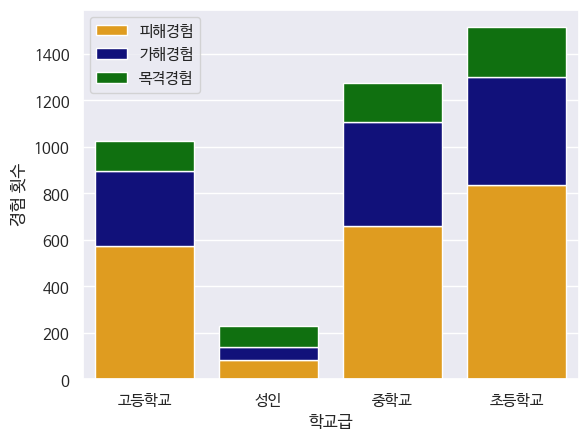

In [ ]:
# 막대그래프 그리기
ax = sns.barplot(data=grouped_df, x='학교급', y='피해경험', label='피해경험', color='orange')
ax = sns.barplot(data=grouped_df, x='학교급', y='가해경험', bottom=grouped_df['피해경험'], label='가해경험',color = 'darkblue')
ax = sns.barplot(data=grouped_df, x='학교급', y='목격경험', bottom=grouped_df['피해경험'] + grouped_df['가해경험'], label='목격경험', color = 'green')

ax.legend()

ax.set(xlabel='학교급', ylabel='경험 횟수')

plt.show()

## 1-1. 초중고별 피해 유형 분석 - 빈도수


In [ ]:
df['Q8_1'].value_counts()

1.0    1128
2.0    1023
Name: Q8_1, dtype: int64

In [ ]:
#### 피해경험 -> 빈도수 별로 유형 분석(1 ~2는 가끔, 3~5는 자주 )

#질문별 응답 -> 가끔, 자주로 나누어 분석
def label(value):
    if 1 <= value <= 2:
        return '가끔'
    elif 3 <= value <= 5:
        return '자주'
    else:
        return '무응답'


def analyze_frequency(df,school = "전체"):
    tmp = df.loc[df['피해경험'] == 1,['Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7', 'Q8a_8']]
    labelled_df = tmp.applymap(label)
    melted_df = labelled_df.melt(var_name='Question', value_name='Frequency')   # melt() 함수 알아두기!
    melted_df = melted_df[melted_df['Frequency'] != '무응답']

    total_counts = melted_df.groupby('Question').size().reset_index(name='count')

    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=melted_df, x='Question', hue='Frequency', palette=['orange', 'blue'])

    ax.plot(np.arange(len(total_counts)), total_counts['count'], marker='o', linestyle='-', label='전체 데이터 수', color='red')

    ax.legend()
    ax.set(xlabel='질문', ylabel='응답 개수')
    ax.set_title(f"[{school}] 피해 유형별 빈도수")
    plt.show()

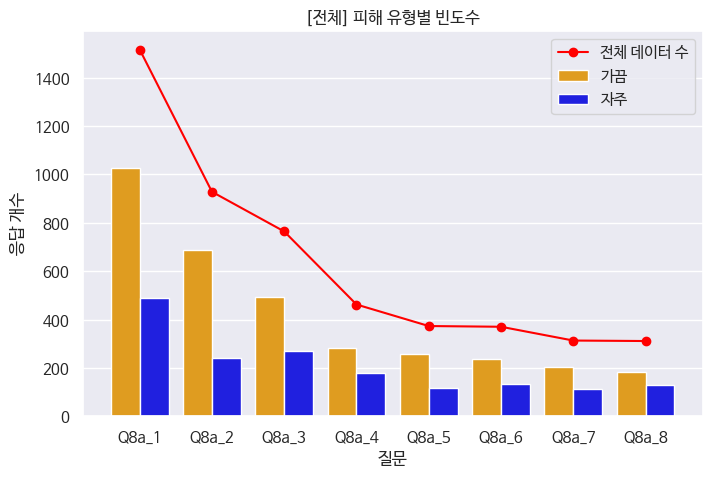

In [ ]:
# 전체
analyze_frequency(df_have_exp, '전체')

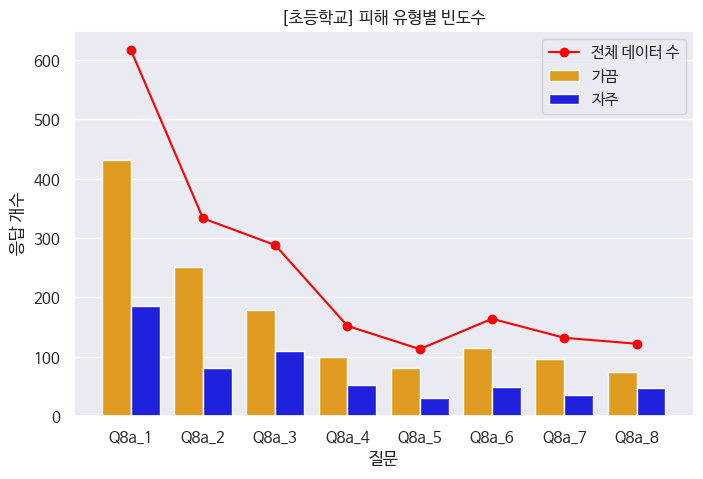

In [ ]:
# 초등학생 - Q8a_6) 사이버불링(대화 참여하지 못하게 왕따 or 퇴장하지 못하게 막고 놀리거나 욕함)
analyze_frequency(df_have_exp.loc[df_have_exp['학교급'] == '초등학교'], '초등학교')

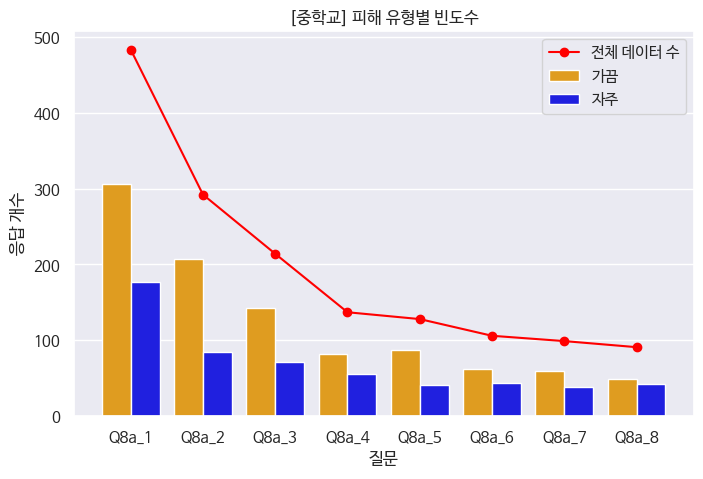

In [ ]:
# 중학생
analyze_frequency(df_have_exp.loc[df_have_exp['학교급'] == '중학교'], '중학교')

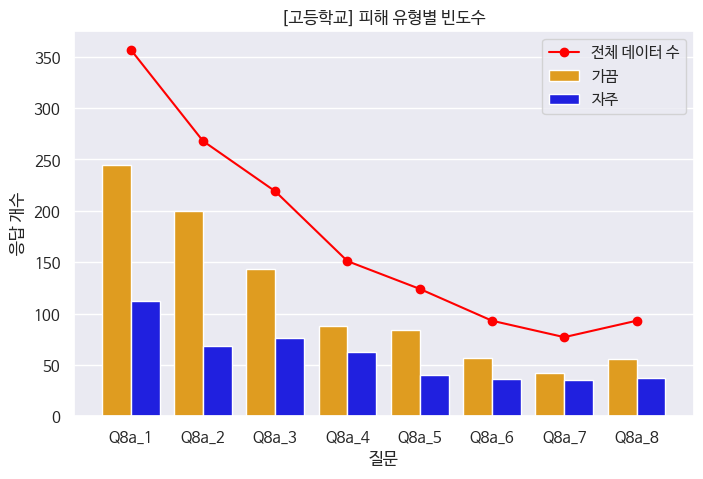

In [ ]:
# 고등학생
analyze_frequency(df_have_exp.loc[df_have_exp['학교급'] == '고등학교'], '고등학교')

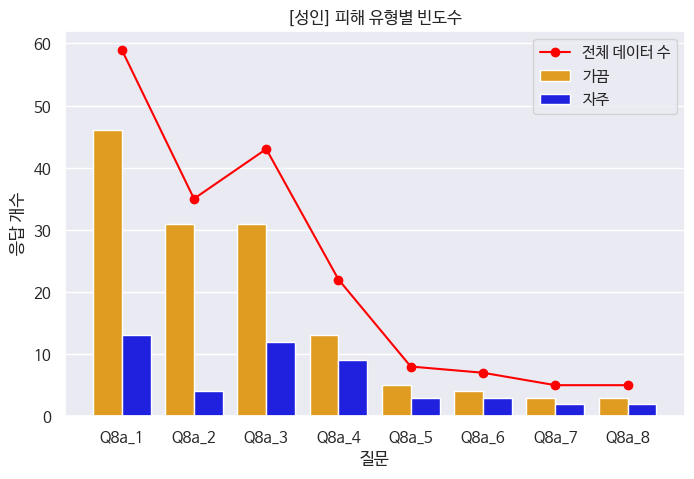

In [ ]:
# 성인
analyze_frequency(df_have_exp.loc[df_have_exp['학교급'] == '성인'], '성인')

In [ ]:
tmp = df_have_exp.loc[df_have_exp['피해경험'] == 1,['Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7', 'Q8a_8']]
tmp

,Q8a_1,Q8a_2,Q8a_3,Q8a_4,Q8a_5,Q8a_6,Q8a_7,Q8a_8
2,9,1,9,9,1,9,9,9
9,1,1,1,9,9,9,9,9
12,9,2,1,9,9,9,9,9
17,1,9,1,9,9,9,9,9
26,2,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...
9309,2,1,9,9,9,9,9,9
9312,1,9,5,1,9,9,9,1
9315,4,9,9,9,9,9,9,9
9330,9,9,9,9,9,3,9,9


In [ ]:
labelled_df = tmp.applymap(label)
labelled_df

,Q8a_1,Q8a_2,Q8a_3,Q8a_4,Q8a_5,Q8a_6,Q8a_7,Q8a_8
2,무응답,가끔,무응답,무응답,가끔,무응답,무응답,무응답
9,가끔,가끔,가끔,무응답,무응답,무응답,무응답,무응답
12,무응답,가끔,가끔,무응답,무응답,무응답,무응답,무응답
17,가끔,무응답,가끔,무응답,무응답,무응답,무응답,무응답
26,가끔,무응답,무응답,무응답,무응답,무응답,무응답,무응답
...,...,...,...,...,...,...,...,...
9309,가끔,가끔,무응답,무응답,무응답,무응답,무응답,무응답
9312,가끔,무응답,자주,가끔,무응답,무응답,무응답,가끔
9315,자주,무응답,무응답,무응답,무응답,무응답,무응답,무응답
9330,무응답,무응답,무응답,무응답,무응답,자주,무응답,무응답


In [ ]:
melted_df = labelled_df.melt(var_name='Question', value_name='Frequency')
melted_df = melted_df[melted_df['Frequency'] != '무응답']

In [ ]:
melted_df

,Question,Frequency
1,Q8a_1,가끔
3,Q8a_1,가끔
4,Q8a_1,가끔
5,Q8a_1,가끔
6,Q8a_1,가끔
...,...,...
17193,Q8a_8,가끔
17199,Q8a_8,자주
17200,Q8a_8,자주
17201,Q8a_8,자주


## 1-2. 초중고별 피해 유형별 분석 - 가해자 유형 (아는사람, 모르는사람)


In [ ]:
# 피해경험 -> 아는사람, 모르는 사람 별로 유형 분석

# 전체 피해자 -> 1 = 아는사람, 2 = 모르는 사람      (거의 비슷함)
df_have_exp.loc[df_have_exp['피해경험']==1,'Q8_1'].value_counts()

1.0    1128
2.0    1023
Name: Q8_1, dtype: int64

In [ ]:
#초중고별 by 아는사람/모르는사람 피해 비율 -> 거의 반반
p_df = df_have_exp.loc[df_have_exp['피해경험']==1]
print("====================초등학교====================")
print(p_df.loc[p_df['학교급']=='초등학교','Q8_1'].value_counts())

print("====================중학교====================")
print(p_df.loc[p_df['학교급']=='중학교','Q8_1'].value_counts())

print("====================고등학교====================")
print(p_df.loc[p_df['학교급']=='고등학교','Q8_1'].value_counts())

print("====================성인====================")
print(p_df.loc[p_df['학교급']=='성인','Q8_1'].value_counts())

====================초등학교====================
1.0    425
2.0    410
Name: Q8_1, dtype: int64
====================중학교====================
1.0    341
2.0    317
Name: Q8_1, dtype: int64
====================고등학교====================
1.0    300
2.0    274
Name: Q8_1, dtype: int64
====================성인====================
1.0    62
2.0    22
Name: Q8_1, dtype: int64


In [ ]:
#### 피해경험 -> 아는사람, 모르는 사람 별로 유형 분석 

def analyze_whodid(df,whodid,school = "전체"):
    #빈도수에 따른 가중치 부여 해보기..?
    tmp = df.loc[df['피해경험'] == 1,['Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7', 'Q8a_8']]
    melted_df = tmp.melt(var_name='Question', value_name='answer')   # melt() 함수 알아두기!
    melted_df = melted_df.loc[melted_df['answer'] != 9]
    total_counts = melted_df.groupby('Question').size().reset_index(name='count')

    # plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=melted_df, x='Question')

    # ax.plot(np.arange(len(total_counts)), total_counts['count'], marker='o', linestyle='-', label='전체 데이터 수', color='red')

    ax.set(xlabel='질문', ylabel='응답 개수')
    ax.set_title(f"[{school}] {whodid} - 피해유형 ")

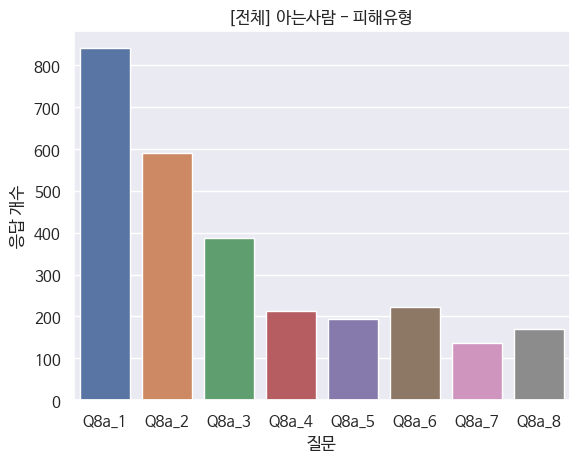

In [ ]:
# 전체 피해경험자 중 아는사람 - 피해유형 분석 (파이차트로 비율로 그리면 더 좋을 수도 있을듯 ㅠ)

analyze_whodid(df_have_exp.loc[df_have_exp['Q8_1'] == 1.0],'아는사람')

- 아는사람 : 1,2,3,6,4,5,8,7
- 모르는사람 :1,3,2,4,7,5,6,8

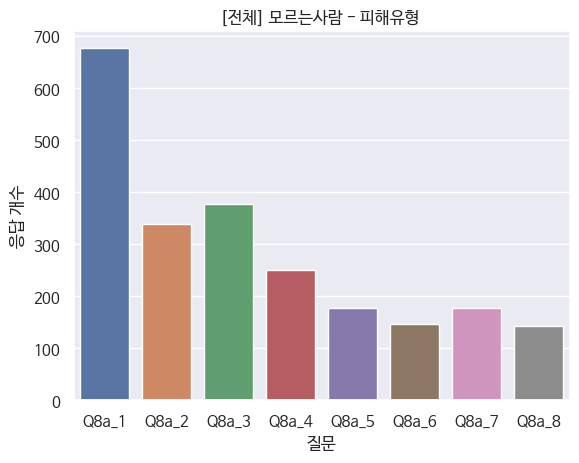

In [ ]:
# 전체 피해경험자 중 모르는 사람 
#8Qa_3) 누군가 내가 싫어하는데도 이메일이나 쪽지를 꼐속보내거나 sns에 계속 방문에 글이나 사진을 남김

analyze_whodid(df_have_exp.loc[df_have_exp['Q8_1'] == 2.0],'모르는사람')

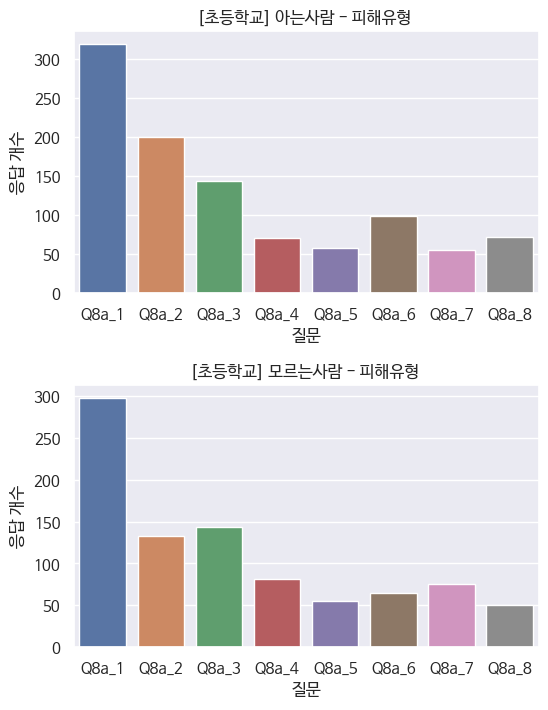

In [ ]:
# 초등학생  - 아는사람으로 부터 피해
plt.figure(figsize =(6,8) )
plt.subplots_adjust(hspace=0.35)    # 서브플롯간 간격조정
plt.subplot(2,1,1)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 1.0 ) & (df_have_exp['학교급']=='초등학교')],'아는사람', '초등학교')
plt.subplot(2,1,2)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 2.0 ) & (df_have_exp['학교급']=='초등학교')],'모르는사람', '초등학교')
plt.show()

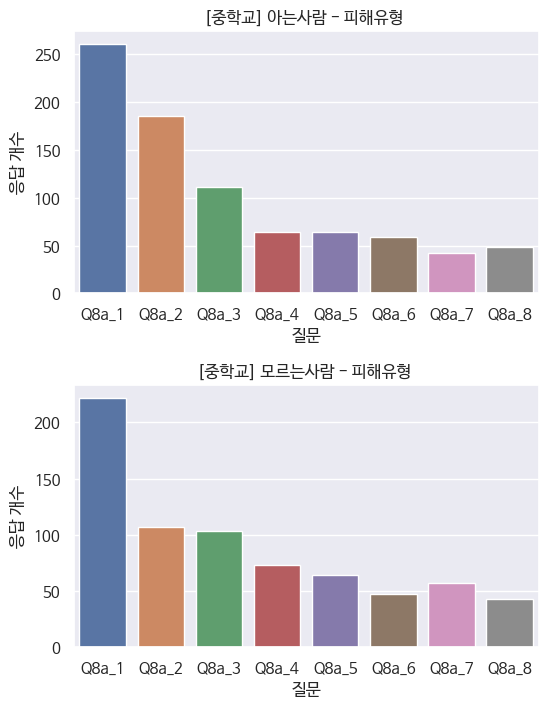

In [ ]:
# 중학생  - 아는사람으로 부터 피해
plt.figure(figsize =(6,8) )
plt.subplots_adjust(hspace=0.35)    # 서브플롯간 간격조정
plt.subplot(2,1,1)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 1.0 ) & (df_have_exp['학교급']=='중학교')],'아는사람', '중학교')
plt.subplot(2,1,2)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 2.0 ) & (df_have_exp['학교급']=='중학교')],'모르는사람', '중학교')
plt.show()

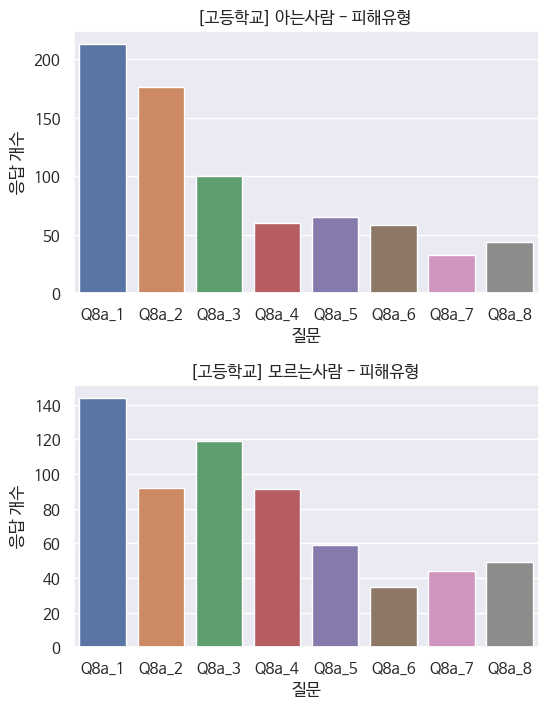

In [ ]:
# 고등학교  - 모르는사람으로 부터 피해
plt.figure(figsize =(6,8) )
plt.subplots_adjust(hspace=0.35)    # 서브플롯간 간격조정
plt.subplot(2,1,1)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 1.0 ) & (df_have_exp['학교급']=='고등학교')],'아는사람', '고등학교')
plt.subplot(2,1,2)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 2.0 ) & (df_have_exp['학교급']=='고등학교')],'모르는사람', '고등학교')
plt.show()

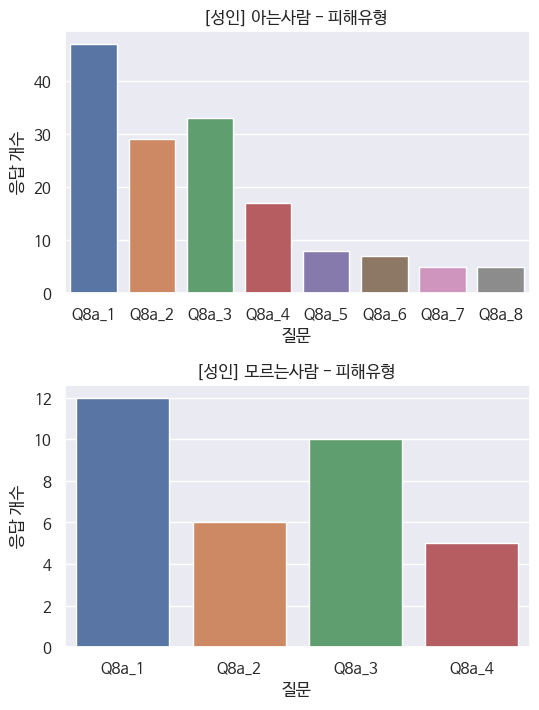

In [ ]:
# 성인  - 아는 사람으로 부터 피해
plt.figure(figsize =(6,8) )
plt.subplots_adjust(hspace=0.35)    # 서브플롯간 간격조정
plt.subplot(2,1,1)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 1.0 ) & (df_have_exp['학교급']=='성인')],'아는사람', '성인')
plt.subplot(2,1,2)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 2.0 ) & (df_have_exp['학교급']=='성인')],'모르는사람', '성인')
plt.show()

### 초중고 별 가해,피해,목격 경험, 경험없음 사람들 인터넷 사용빈도 분석

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!
from sklearn.metrics import matthews_corrcoef
import scipy.stats as spst

In [ ]:
df.head()

,SQ5,Q1,Q2_1,Q2_2,Q2_3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,...,Q8_1a_3,Q8_1a_4,Q8_1a_5,Q8_1a_6,Q8_1a_7,Q9_1a_6,Q9_1a_7,피해경험,가해경험,목격경험
0,2,3,2,5,1,4,4,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2,4,2,4,6,4,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,1,2,2,5,3,4,3,4,4,3,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
3,2,6,2,5,4,4,4,3,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2,2,5,2,4,4,4,4,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
def use_freq(df):
    exp_p = df.loc[df['피해경험']==1]
    exp_g = df.loc[df['가해경험']==1]
    exp_m = df.loc[df['목격경험']==1]
    exp_no = df.loc[(df['피해경험']==0) & (df['목격경험']==0) & (df['가해경험']==0)]    #아무경험 없음
    print(exp_p.shape, exp_g.shape, exp_m.shape, exp_no.shape)
    # 경험별 인터넷 이용시간 평균
    mean_p = exp_p['Q1'].mean()
    mean_g = exp_g['Q1'].mean()
    mean_m = exp_m['Q1'].mean()
    mean_no = exp_no['Q1'].mean()
    print("피해경험 인터넷이용평균 : ",mean_p)
    print("가해경험 인터넷이용평균 : ",mean_g)
    print("목격경험 인터넷이용평균 : ",mean_m)
    print("무경험 인터넷이용평균 : ",mean_no)

    print("=============================================================")

    #카이제곱검정, 시각화
    for target in ['피해경험', '가해경험', '목격경험']:
        temp = pd.crosstab(df['Q1'],df[target],normalize = True)
        print(spst.chi2_contingency(temp))
        display(temp)
        temp.plot.bar(stacked=True)
        plt.axhline(df[target].mean(),color = 'r')
        plt.show()

        a = df[target].values
        b = df['Q1'].values
        print('두 범주형 변수 간 상관계수 : ',round(matthews_corrcoef(b,a),3))
        # print('두 범주형 변수 간 상관계수 : ',spst.pointbiserialr(b,a))



(2151, 140) (1290, 140) (604, 140) (6344, 140)
피해경험 인터넷이용평균 :  3.5718270571827055
가해경험 인터넷이용평균 :  3.6108527131782946
목격경험 인터넷이용평균 :  3.3857615894039736
무경험 인터넷이용평균 :  3.3578184110970994
Chi2ContingencyResult(statistic=0.0050318801107841525, pvalue=0.9999999046338814, dof=5, expected_freq=array([[0.06025105, 0.01798751],
       [0.18857263, 0.05629698],
       [0.20190688, 0.06027782],
       [0.13243708, 0.03953812],
       [0.07235065, 0.02159976],
       [0.11457577, 0.03420576]]))


피해경험,0,1
Q1,,
1,0.065413,0.012826
2,0.196558,0.048311
3,0.199124,0.063061
4,0.128260,0.043715
5,0.069688,0.024263
6,0.111052,0.037730


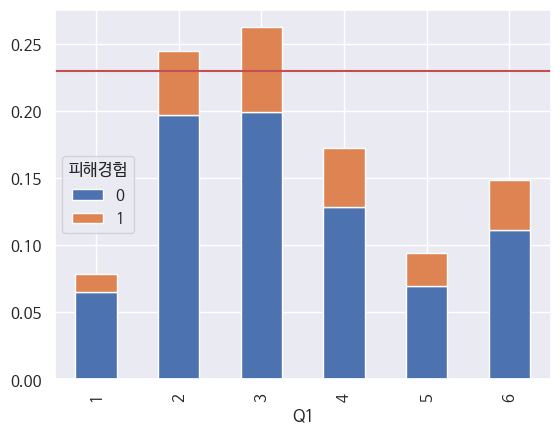

두 범주형 변수 간 상관계수 :  -0.01
Chi2ContingencyResult(statistic=0.003343835128996743, pvalue=0.9999999656487675, dof=5, expected_freq=array([[0.06745107, 0.01078749],
       [0.21110712, 0.03376248],
       [0.22603482, 0.03614988],
       [0.14826336, 0.02371184],
       [0.08099658, 0.01295383],
       [0.12826762, 0.02051391]]))


가해경험,0,1
Q1,,
1,0.070864,0.007375
2,0.215690,0.029179
3,0.225310,0.036875
4,0.146323,0.025652
5,0.080056,0.013895
6,0.123878,0.024904


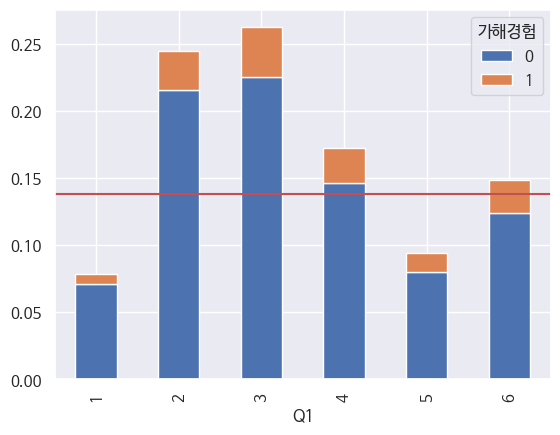

두 범주형 변수 간 상관계수 :  -0.008
Chi2ContingencyResult(statistic=0.0006401827106082191, pvalue=0.9999999994485459, dof=5, expected_freq=array([[0.07318768, 0.00505089],
       [0.22906143, 0.01580817],
       [0.24525871, 0.01692599],
       [0.16087291, 0.01110229],
       [0.0878852 , 0.0060652 ],
       [0.13917657, 0.00960496]]))


목격경험,0,1
Q1,,
1,0.073856,0.004382
2,0.229799,0.015071
3,0.242839,0.019346
4,0.160539,0.011437
5,0.088286,0.005665
6,0.140124,0.008658


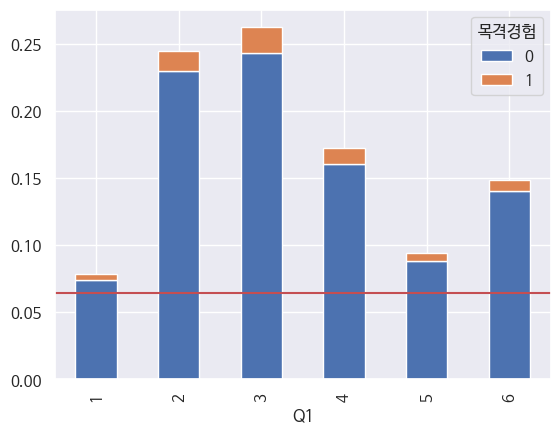

두 범주형 변수 간 상관계수 :  -0.002


In [ ]:
use_freq(df)

(835, 140) (467, 140) (212, 140) (1868, 140)
피해경험 인터넷이용평균 :  3.3700598802395207
가해경험 인터넷이용평균 :  3.387580299785867
목격경험 인터넷이용평균 :  3.108490566037736
무경험 인터넷이용평균 :  2.880085653104925
Chi2ContingencyResult(statistic=0.022674763544767905, pvalue=0.9999959150192614, dof=5, expected_freq=array([[0.09216555, 0.03536683],
       [0.21889317, 0.08399623],
       [0.18697125, 0.07174678],
       [0.10080607, 0.03868248],
       [0.05352322, 0.02053855],
       [0.07032423, 0.02698563]]))


피해경험,0,1
Q1,,
1,0.102624,0.024909
2,0.237131,0.065759
3,0.185320,0.073398
4,0.091996,0.047493
5,0.047493,0.026569
6,0.058120,0.039190


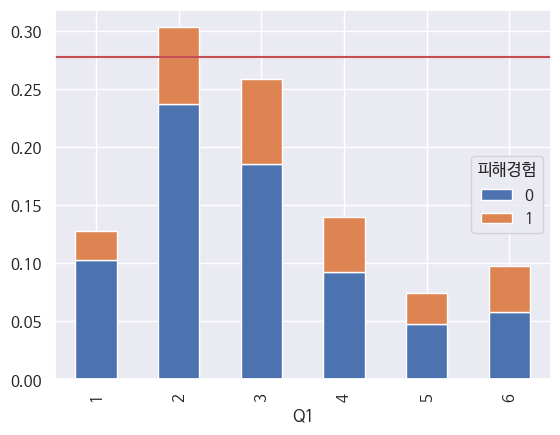

두 범주형 변수 간 상관계수 :  -0.019
Chi2ContingencyResult(statistic=0.014856628121857174, pvalue=0.9999985765387873, dof=5, expected_freq=array([[0.10775237, 0.01978001],
       [0.25591187, 0.04697753],
       [0.21859139, 0.04012664],
       [0.11785415, 0.02163439],
       [0.06257494, 0.01148683],
       [0.0822173 , 0.01509256]]))


가해경험,0,1
Q1,,
1,0.115908,0.011624
2,0.262039,0.040850
3,0.216207,0.042511
4,0.117237,0.022252
5,0.062438,0.011624
6,0.071073,0.026237


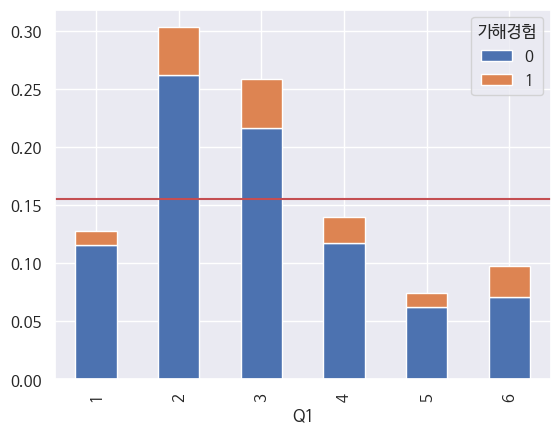

두 범주형 변수 간 상관계수 :  -0.018
Chi2ContingencyResult(statistic=0.0011987003578995065, pvalue=0.999999997354916, dof=5, expected_freq=array([[0.11855302, 0.00897936],
       [0.28156342, 0.02132599],
       [0.24050208, 0.01821595],
       [0.12966736, 0.00982118],
       [0.06884719, 0.00521458],
       [0.09045842, 0.00685144]]))


목격경험,0,1
Q1,,
1,0.119229,0.008303
2,0.283627,0.019263
3,0.239455,0.019263
4,0.127864,0.011624
5,0.070076,0.003985
6,0.089339,0.007971


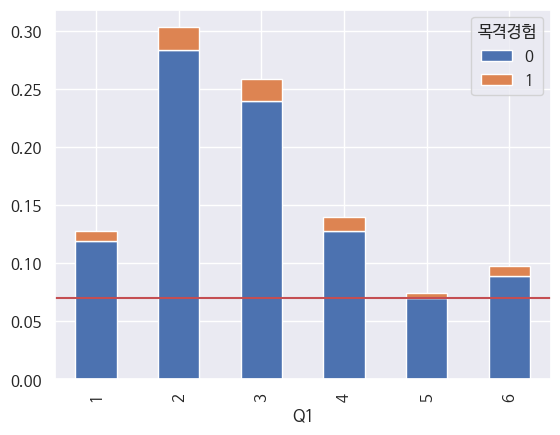

두 범주형 변수 간 상관계수 :  -0.002


In [ ]:
#초등학생 
use_freq(df.loc[df['학교급']=='초등학교'])

(658, 140) (448, 140) (169, 140) (2098, 140)
피해경험 인터넷이용평균 :  3.898176291793313
가해경험 인터넷이용평균 :  3.7879464285714284
목격경험 인터넷이용평균 :  3.7041420118343193
무경험 인터넷이용평균 :  3.607721639656816
Chi2ContingencyResult(statistic=0.00933965064285009, pvalue=0.9999995530829046, dof=5, expected_freq=array([[0.03797424, 0.01066   ],
       [0.15423784, 0.04329714],
       [0.20963861, 0.05884906],
       [0.14981618, 0.04205591],
       [0.0845317 , 0.02372946],
       [0.14461423, 0.04059563]]))


피해경험,0,1
Q1,,
1,0.040640,0.007995
2,0.167888,0.029647
3,0.207861,0.060626
4,0.144237,0.047635
5,0.083278,0.024983
6,0.136909,0.048301


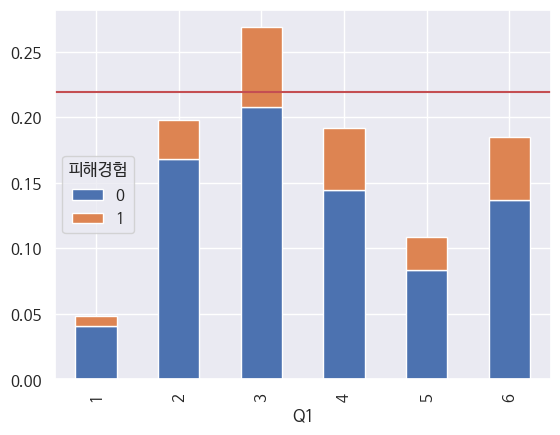

두 범주형 변수 간 상관계수 :  -0.005
Chi2ContingencyResult(statistic=0.006415474026738424, pvalue=0.999999825045262, dof=5, expected_freq=array([[0.04137637, 0.00725788],
       [0.16805607, 0.0294789 ],
       [0.22842023, 0.04006745],
       [0.16323828, 0.02863381],
       [0.09210493, 0.01615623],
       [0.15757028, 0.02763958]]))


가해경험,0,1
Q1,,
1,0.041306,0.007328
2,0.175883,0.021652
3,0.230513,0.037975
4,0.153564,0.038308
5,0.091939,0.016322
6,0.157562,0.027648


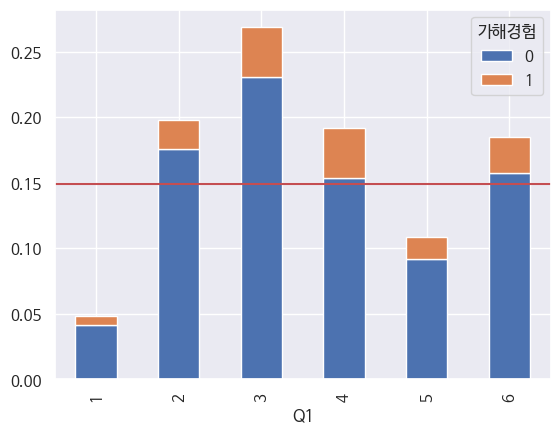

두 범주형 변수 간 상관계수 :  0.0
Chi2ContingencyResult(statistic=0.0018125180193468693, pvalue=0.9999999925651277, dof=5, expected_freq=array([[0.04589634, 0.0027379 ],
       [0.18641459, 0.01112039],
       [0.25337295, 0.01511473],
       [0.18107049, 0.01080159],
       [0.10216651, 0.00609465],
       [0.17478332, 0.01042654]]))


목격경험,0,1
Q1,,
1,0.047302,0.001332
2,0.186209,0.011326
3,0.250833,0.017655
4,0.183211,0.008661
5,0.101266,0.006995
6,0.174883,0.010326


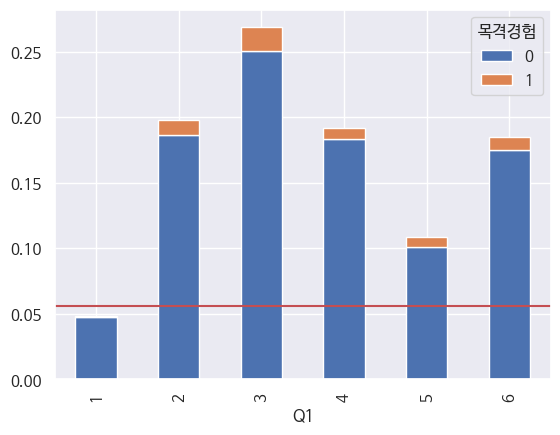

두 범주형 변수 간 상관계수 :  -0.005


In [ ]:
#중학생 
use_freq(df.loc[df['학교급']=='중학교'])

(574, 140) (321, 140) (131, 140) (2177, 140)
피해경험 인터넷이용평균 :  3.451219512195122
가해경험 인터넷이용평균 :  3.601246105919003
목격경험 인터넷이용평균 :  3.045801526717557
무경험 인터넷이용평균 :  3.485989894350023
Chi2ContingencyResult(statistic=0.005105264038638942, pvalue=0.9999999011213486, dof=5, expected_freq=array([[0.05358701, 0.012658  ],
       [0.1987297 , 0.04694274],
       [0.21273234, 0.05025035],
       [0.13517928, 0.03193124],
       [0.07270599, 0.01717417],
       [0.13598713, 0.03212206]]))


피해경험,0,1
Q1,,
1,0.059254,0.006991
2,0.192743,0.052929
3,0.211385,0.051598
4,0.133489,0.033622
5,0.071571,0.018309
6,0.140479,0.027630


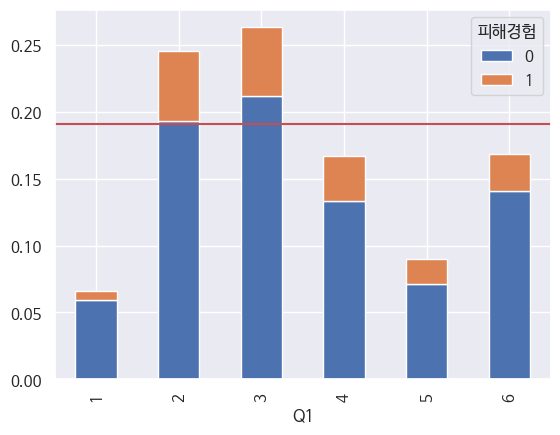

두 범주형 변수 간 상관계수 :  -0.011
Chi2ContingencyResult(statistic=0.003012883397658129, pvalue=0.9999999735249175, dof=5, expected_freq=array([[0.05916623, 0.00707878],
       [0.21942049, 0.02625195],
       [0.23488101, 0.02810168],
       [0.1492535 , 0.01785702],
       [0.08027579, 0.00960437],
       [0.15014546, 0.01796373]]))


가해경험,0,1
Q1,,
1,0.062250,0.003995
2,0.218375,0.027297
3,0.234021,0.028961
4,0.152463,0.014647
5,0.078895,0.010985
6,0.147137,0.020972


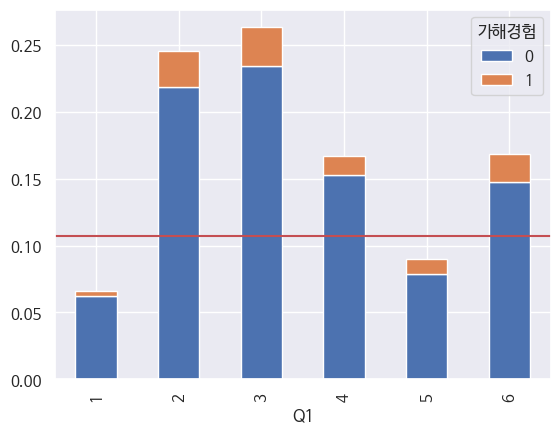

두 범주형 변수 간 상관계수 :  -0.008
Chi2ContingencyResult(statistic=0.005185918213264758, pvalue=0.9999998971726451, dof=5, expected_freq=array([[0.06335616, 0.00288885],
       [0.23495902, 0.01071341],
       [0.2515144 , 0.01146829],
       [0.15982308, 0.00728744],
       [0.08596062, 0.00391954],
       [0.16077819, 0.00733099]]))


목격경험,0,1
Q1,,
1,0.062583,0.003662
2,0.231691,0.013981
3,0.249667,0.013316
4,0.160120,0.006991
5,0.089214,0.000666
6,0.163116,0.004993


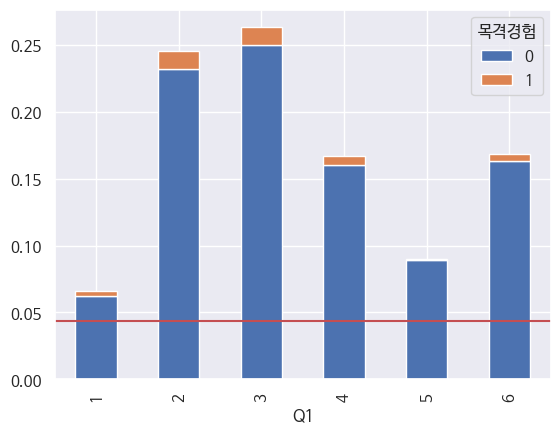

두 범주형 변수 간 상관계수 :  0.003


In [ ]:
#고등학생 
use_freq(df.loc[df['학교급']=='고등학교'])

(84, 140) (54, 140) (92, 140) (201, 140)
피해경험 인터넷이용평균 :  3.8452380952380953
가해경험 인터넷이용평균 :  4.12962962962963
목격경험 인터넷이용평균 :  3.9239130434782608
무경험 인터넷이용평균 :  3.800995024875622
Chi2ContingencyResult(statistic=0.05462592188534938, pvalue=0.9999636185214639, dof=5, expected_freq=array([[0.00665675, 0.00219281],
       [0.10650795, 0.03508497],
       [0.17307542, 0.05701308],
       [0.24629963, 0.081134  ],
       [0.13535385, 0.04458715],
       [0.08431879, 0.0277756 ]]))


피해경험,0,1
Q1,,
1,0.008850,0.000000
2,0.123894,0.017699
3,0.135693,0.094395
4,0.262537,0.064897
5,0.129794,0.050147
6,0.091445,0.020649


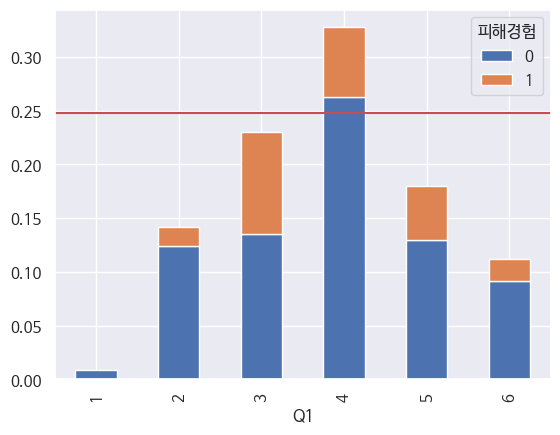

두 범주형 변수 간 상관계수 :  -0.004
Chi2ContingencyResult(statistic=0.023971187065789948, pvalue=0.9999953080214765, dof=5, expected_freq=array([[0.00743989, 0.00140966],
       [0.1190383 , 0.02255462],
       [0.19343723, 0.03665126],
       [0.27527606, 0.05215757],
       [0.15127783, 0.02866317],
       [0.09423865, 0.01785574]]))


가해경험,0,1
Q1,,
1,0.008850,0.000000
2,0.132743,0.008850
3,0.182891,0.047198
4,0.286136,0.041298
5,0.141593,0.038348
6,0.088496,0.023599


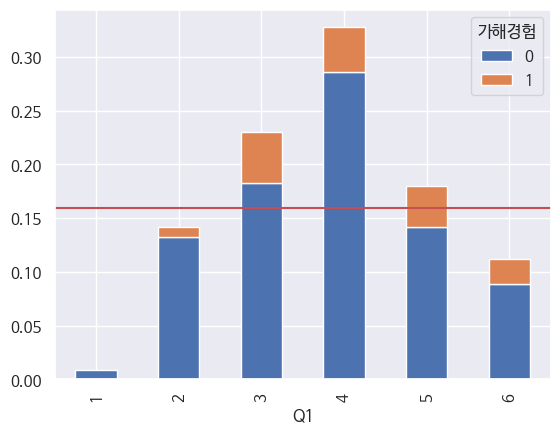

두 범주형 변수 간 상관계수 :  -0.003
Chi2ContingencyResult(statistic=0.030602987047954767, pvalue=0.9999913798668404, dof=5, expected_freq=array([[0.00644791, 0.00240165],
       [0.10316652, 0.0384264 ],
       [0.1676456 , 0.0624429 ],
       [0.23857258, 0.08886104],
       [0.13110746, 0.04883355],
       [0.0816735 , 0.0304209 ]]))


목격경험,0,1
Q1,,
1,0.005900,0.002950
2,0.120944,0.020649
3,0.141593,0.088496
4,0.253687,0.073746
5,0.126844,0.053097
6,0.079646,0.032448


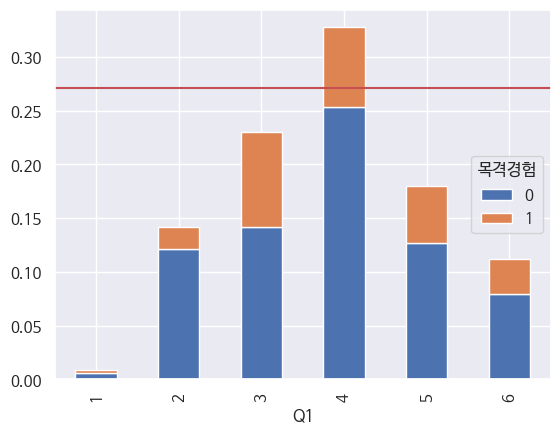

두 범주형 변수 간 상관계수 :  0.001


In [ ]:
#고등학생 
use_freq(df.loc[df['학교급']=='성인'])

## 1-4.초중고 피해 유형별 서비스 매체


In [ ]:
# 초중고 피해 유형별 서비스 매체
# 피해 경험 1 -> Q_8_1 의 피해 경험 있음을 1컬럼으로 추가 -> Q8_4_1~7 중 어떤 서비스로 단변량 분석, 이변량 분석?
pd.set_option('display.max_columns', None) 
df_have_exp.tail(2)

,SQ5,Q1,Q2_1,Q2_2,Q2_3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_1a,Q6_1a_6_etc,Q7a,Q7_1_1,Q7_1_2,Q7_1_3,Q7_1_4,Q7_1_5,Q7_1_6,Q7_1_7,Q7_1_8,Q8a_1,Q8a_2,Q8a_3,Q8a_4,Q8a_5,Q8a_6,Q8a_7,Q8a_8,Q8_1,Q8_9_1,Q8_9_2,Q8_9_3,Q8_9_4,Q8_9_5,Q8_9_6,Q8_9_7,Q8_4_1,Q8_4_2,Q8_4_3,Q8_4_4,Q8_4_5,Q8_4_6,Q8_4_7,Q8_4_7_etc,Q9a_1,Q9a_2,Q9a_3,Q9a_4,Q9a_5,Q9a_6,Q9a_7,Q9a_8,Q9_1,Q9_2,Q9_3_1,Q9_3_2,Q9_3_3,Q9_3_4,Q9_3_5,Q9_3_6,Q9_3_7,Q9_3_7_etc,Q9_4_1,Q9_4_2,Q9_4_3,Q9_4_4,Q9_4_5,Q9_4_6,Q9_6_1,Q9_6_2,Q9_6_3,Q9_6_4,Q9_6_5,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q10_7,Q10_8,Q10_9,Q10_10,Q10_11,Q10_12,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12_3,Q15,Q15_1_1,Q15_1_2,Q15_1_3,Q15_1_4,Q15_1_5,Q15_1_4_etc,Q15_2,Q15_3,Q17,학교급,Q7,Q9_1a_1,Q9_1a_2,Q9_1a_3,Q9_1a_4,Q9_1a_5,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q8_1a_1,Q8_1a_2,Q8_1a_3,Q8_1a_4,Q8_1a_5,Q8_1a_6,Q8_1a_7,Q9_1a_6,Q9_1a_7,피해경험,가해경험,목격경험
9344,2,4,2,6,4,4,4,4,4,4,4,4,4,9,9,9,9,9,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,7.0,8.0,9,9,9,9,9,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9,9,9,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9,9,9,9,9,9,9,9,9,9,4,4,4,4,4,4,1,NaN,2.0,NaN,NaN,NaN,NaN,4.0,4,1,고등학교,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
9350,2,2,2,4,5,4,4,4,4,4,4,4,4,9,3,1,2,1,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,9,9,9,9,9,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9,9,9,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9,9,9,9,9,9,9,9,9,9,3,3,3,3,3,3,1,1.0,2.0,NaN,NaN,NaN,NaN,3.0,4,2,고등학교,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0


In [ ]:
df_have_exp.shape

(3012, 140)

(1457, 231)

In [ ]:
type_dict = {
    'Q8a_1': '언어폭력(1)',
    'Q8a_2': '명예훼손(2)',
    'Q8a_3': '스토킹(3)',
    'Q8a_4': '성폭력(4)',
    'Q8a_5': '신상정보유출(5)',
    'Q8a_6': '사이버따돌림(6)',
    'Q8a_7': '사이버갈취(7)',
    'Q8a_8': '사이버강요(8)'
}
service_dict = {
    'Q8_4_1':'문자/인스턴트 메세지(카톡)',
    'Q8_4_2':'커뮤니티 동호회(카페,클럽)',
    'Q8_4_3': 'SNS',
    'Q8_4_4': '개인홈페이지',
    'Q8_4_5': '이메일',
    'Q8_4_6': '온라인 게임',
    'Q8_4_7': '기타'

}

In [ ]:
def analyze_service(df_have_exp,age):
    i = 1
    plt.figure(figsize = (16,12))
    plt.subplots_adjust(hspace = 0.5)
    plt.suptitle(f'<{age}>')
    for p_type in ['Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7','Q8a_8']:
        
        exp_p = df_have_exp.loc[(df_have_exp['피해경험']==1) & (df_have_exp[p_type]<=5)].copy()
        # Q8_4_1~8_4_7 -> 어떤 서비스?
        temp = exp_p.loc[:, ['Q8_4_1','Q8_4_2','Q8_4_3','Q8_4_4','Q8_4_5','Q8_4_6','Q8_4_7']]
        melted_df = temp.melt(var_name = 'Question', value_name = 'answer')
        melted_df = melted_df.dropna()
        
        plt.subplot(3,3,i)
        ax = sns.countplot(data = melted_df, x = 'Question')
        ax.set(xlabel = '피해 경험 경로', ylabel = '응답개수' )
        ax.set_title(f'{type_dict[p_type]} - 피해 경험 경로 ')
        plt.xticks(rotation=45)
        i+=1
    plt.show()


In [ ]:
# exp_p['p_type1'] = exp_p.apply(lambda x : 1 if x['Q8a_1'] <= 5 else 0, axis = 1)
# exp_p['p_type2'] = exp_p.apply(lambda x : 1 if x['Q8a_2'] <= 5 else 0, axis = 1)
# exp_p['p_type3'] = exp_p.apply(lambda x : 1 if x['Q8a_3'] <= 5 else 0, axis = 1)
# exp_p['p_type4'] = exp_p.apply(lambda x : 1 if x['Q8a_4'] <= 5 else 0, axis = 1)
# exp_p['p_type5'] = exp_p.apply(lambda x : 1 if x['Q8a_5'] <= 5 else 0, axis = 1)

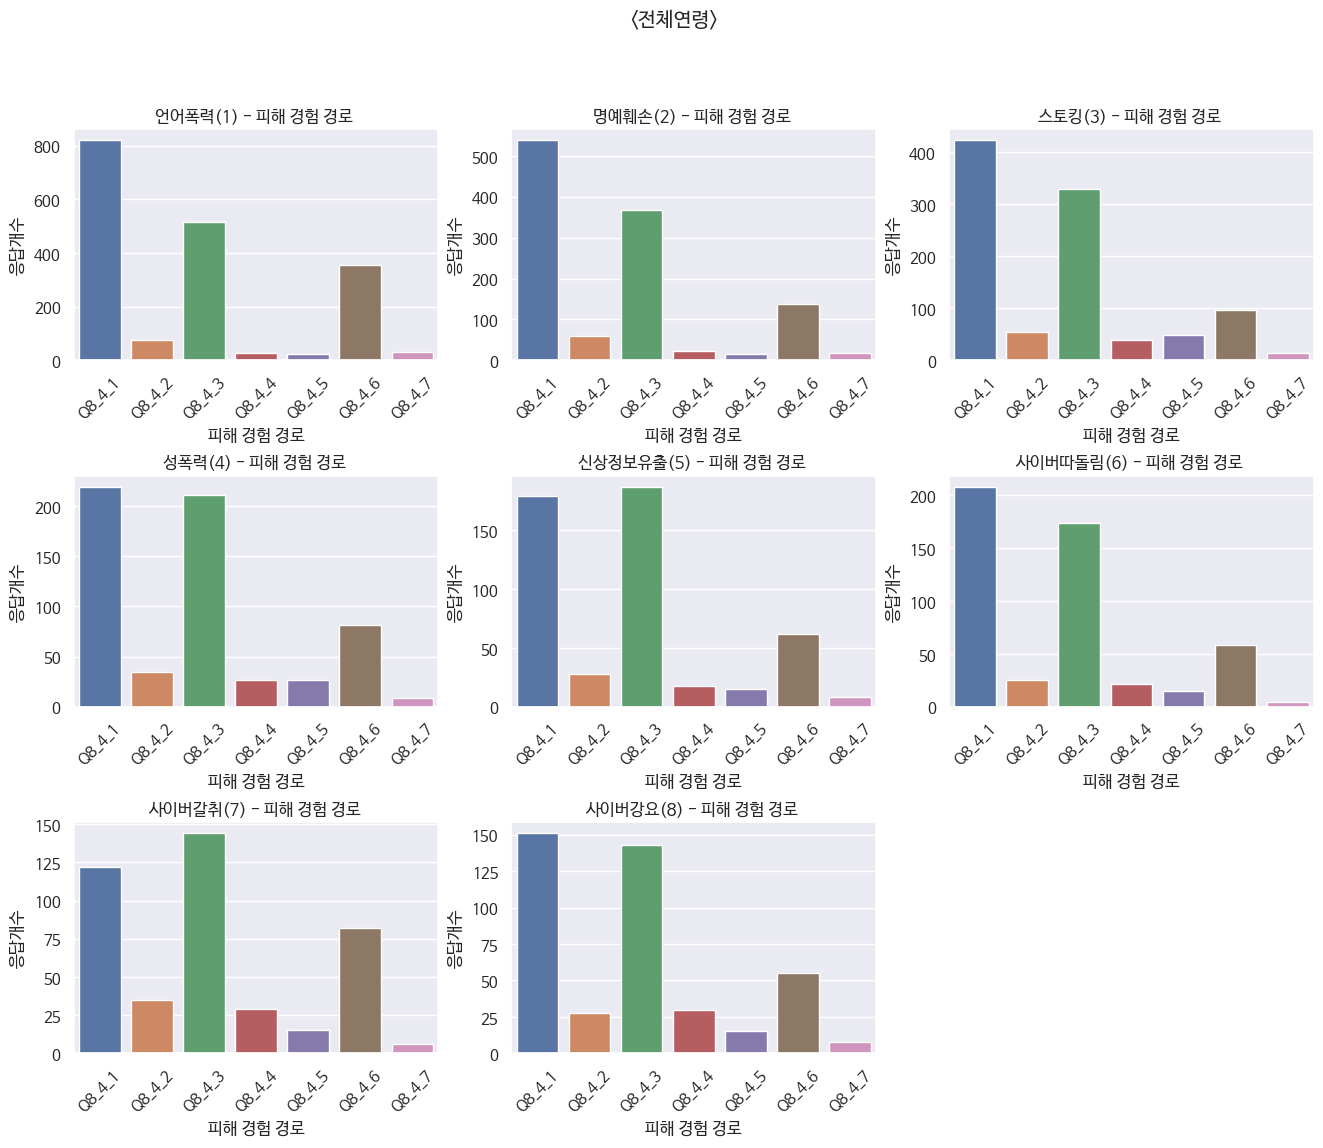

In [ ]:
analyze_service(df_have_exp,'전체연령')

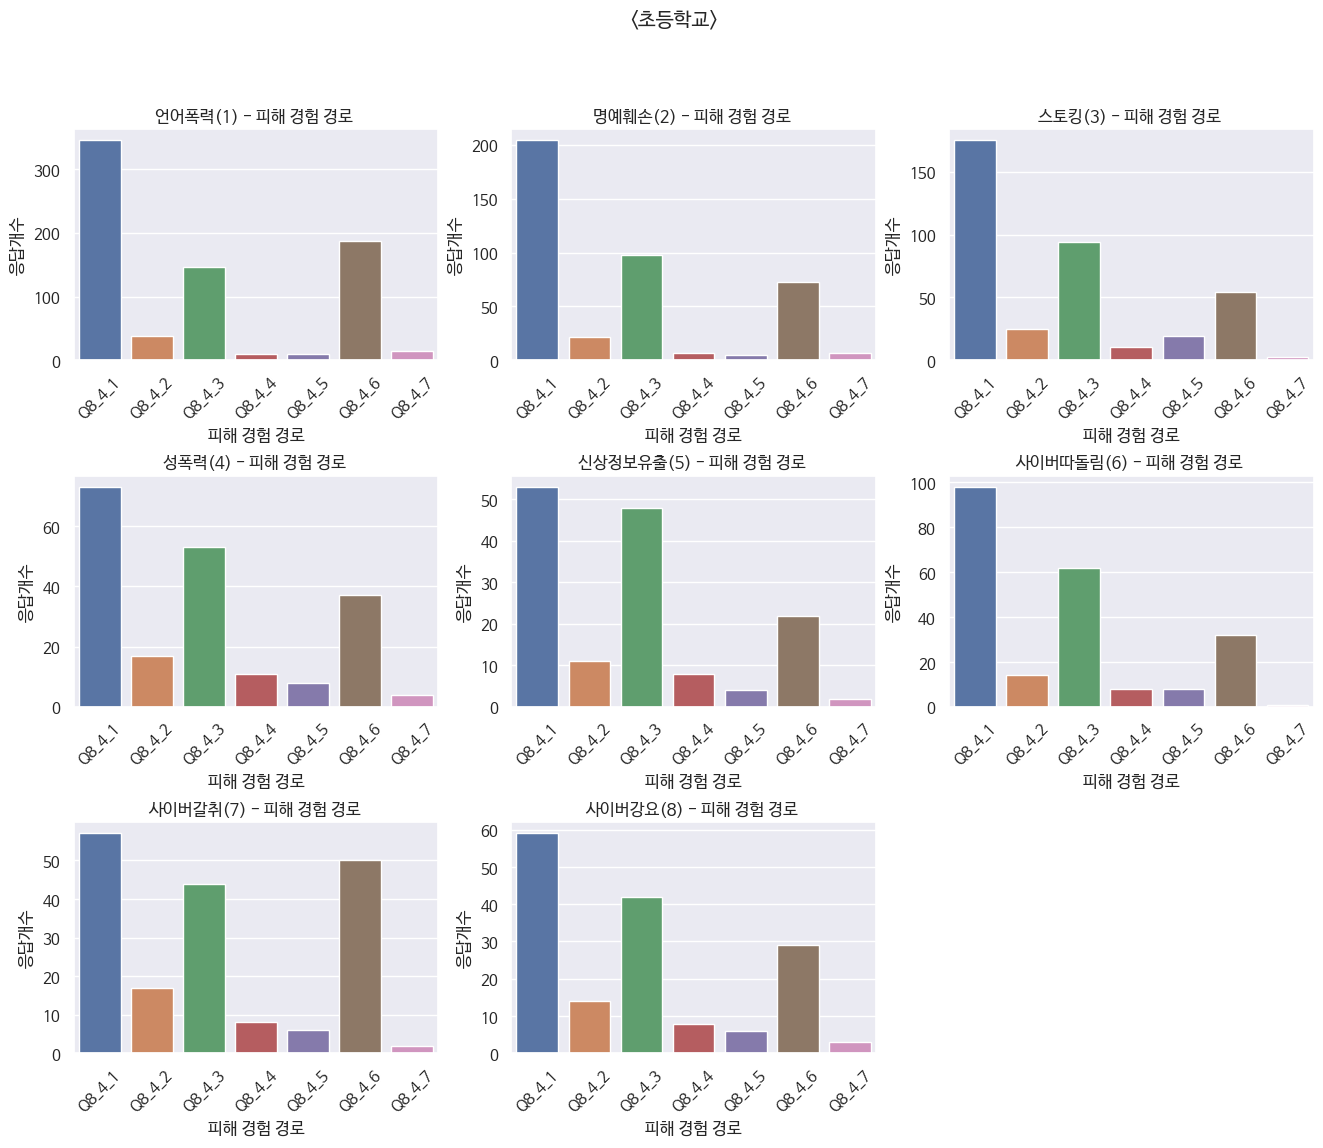

In [ ]:
analyze_service(df_have_exp.loc[df_have_exp['학교급']=='초등학교'], '초등학교')

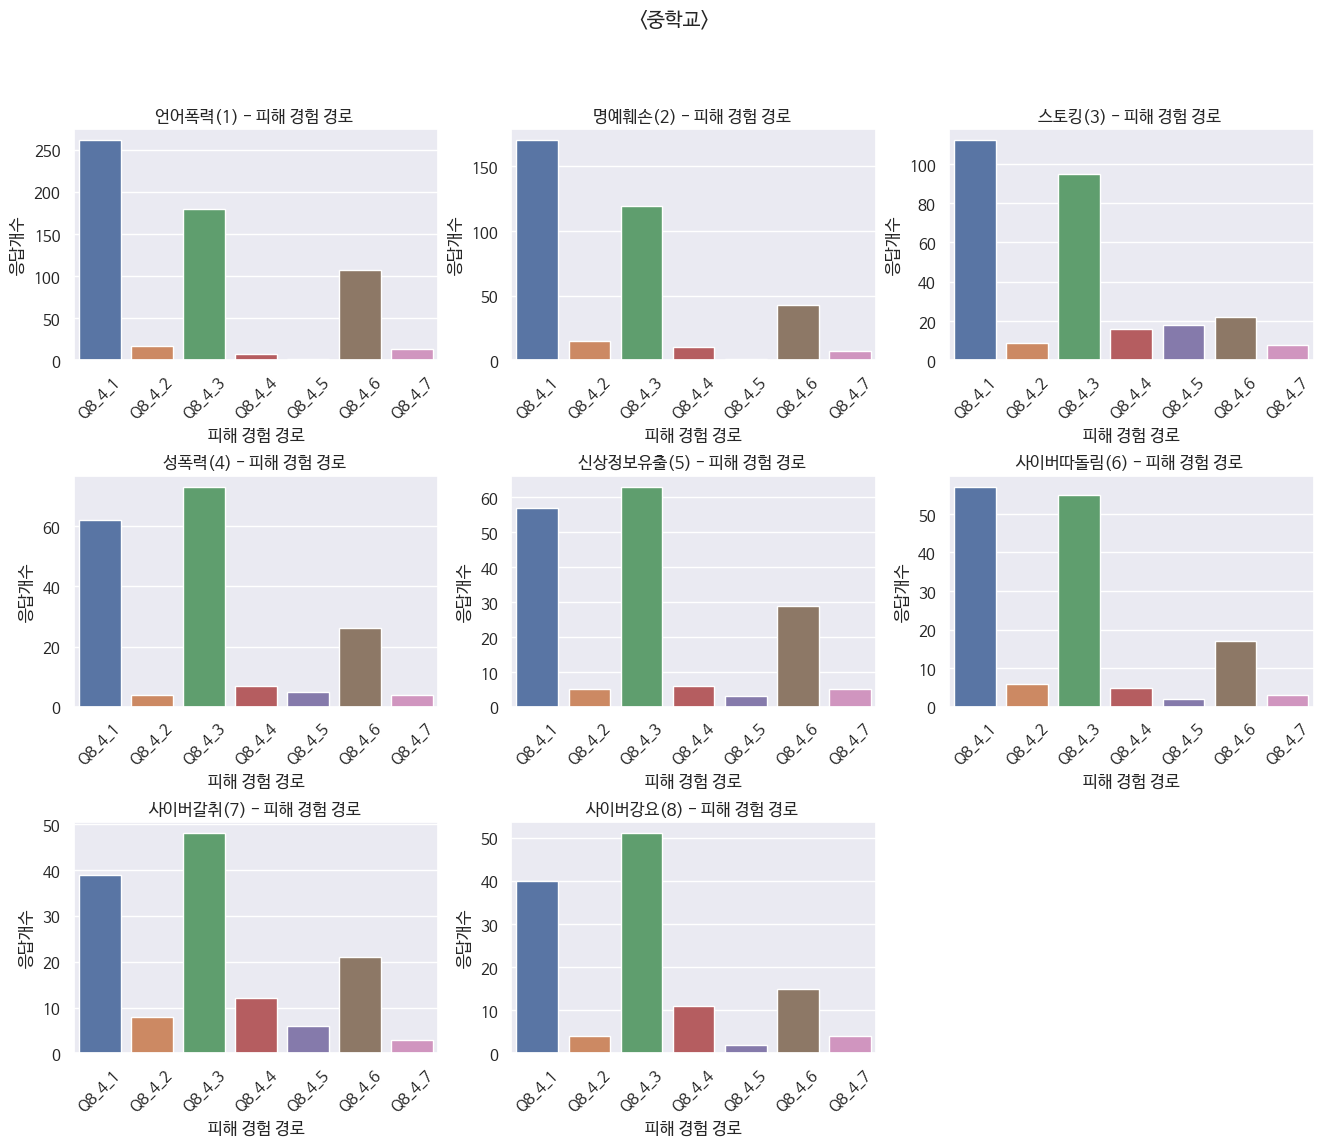

In [ ]:
analyze_service(df_have_exp.loc[df_have_exp['학교급']=='중학교'],'중학교')

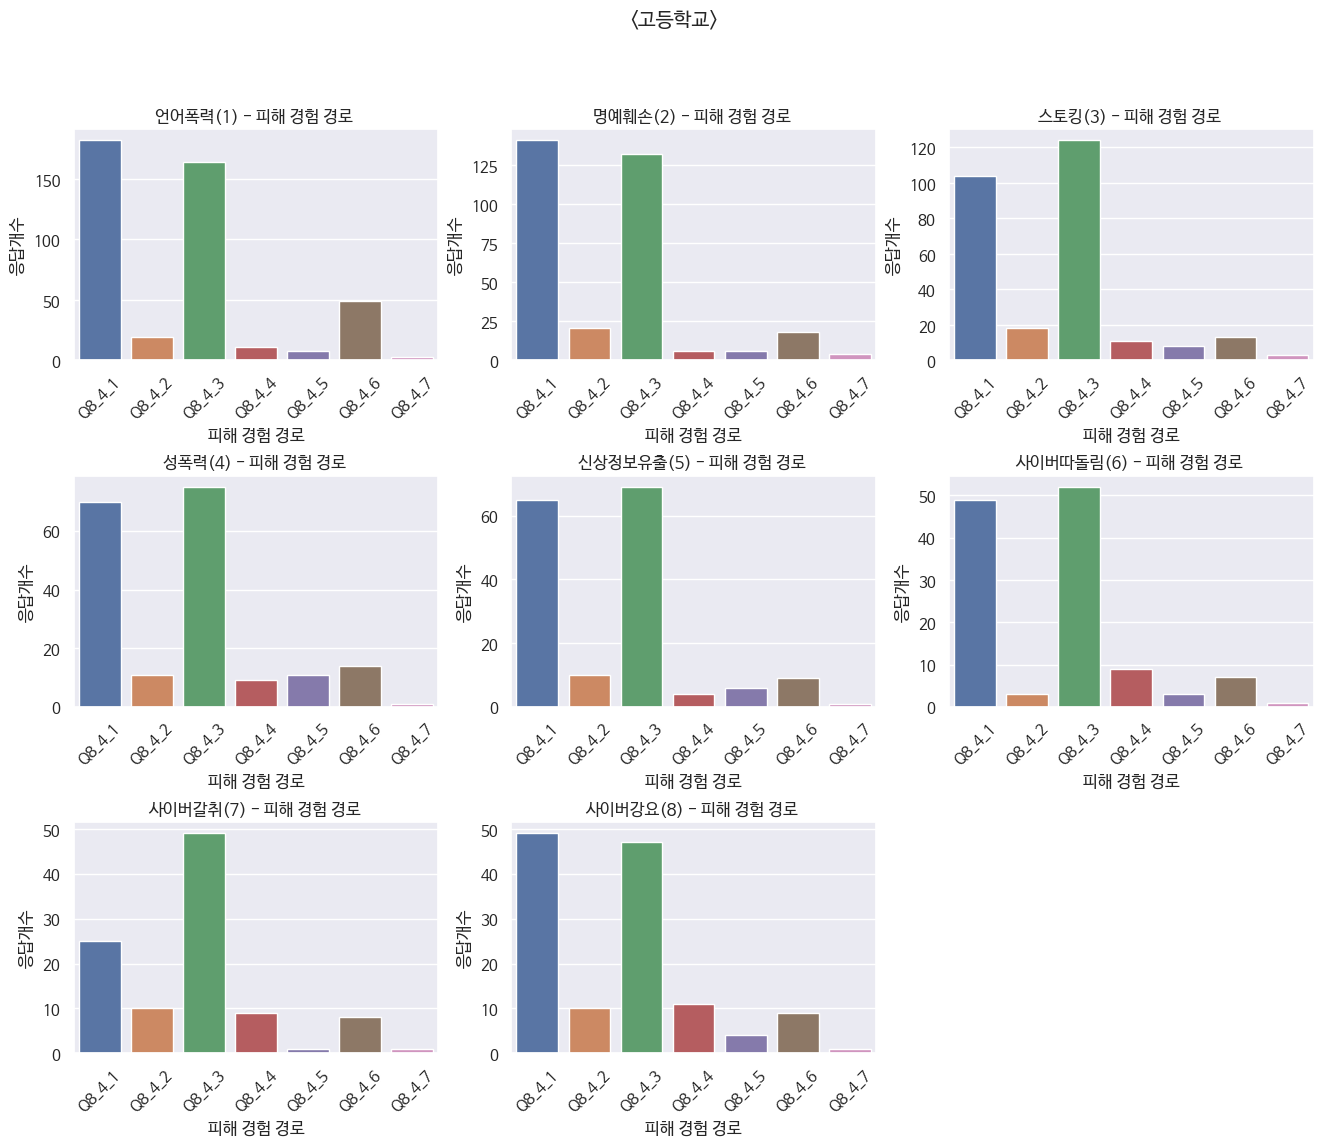

In [ ]:
analyze_service(df_have_exp.loc[df_have_exp['학교급']=='고등학교'],'고등학교')

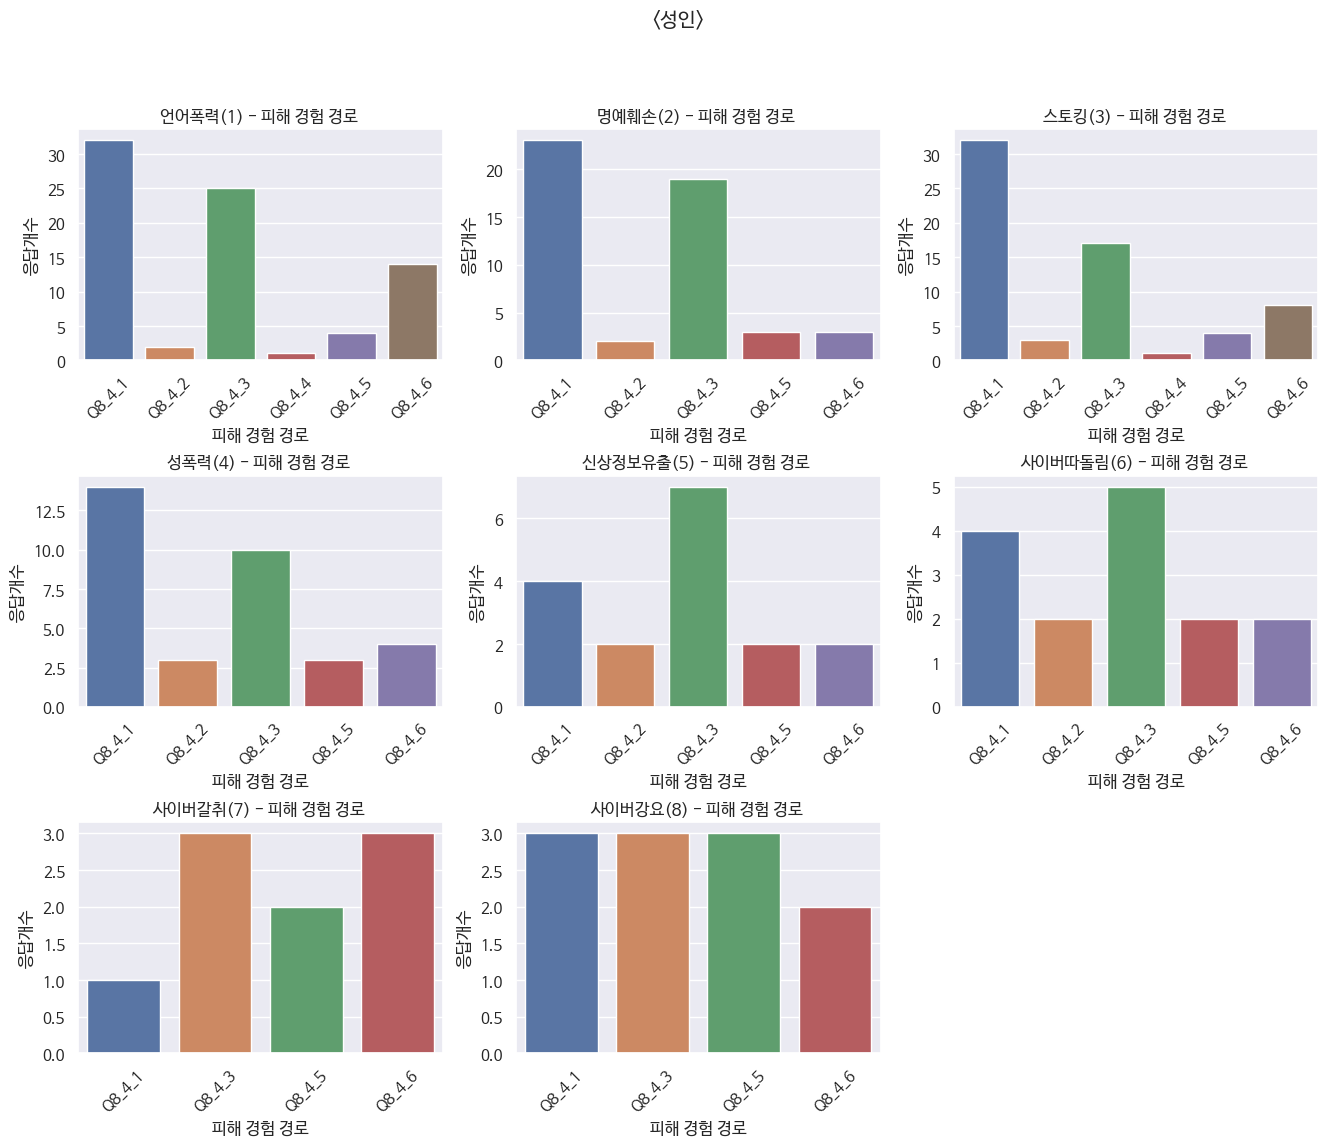

In [ ]:
analyze_service(df_have_exp.loc[df_have_exp['학교급']=='성인'],'성인')

In [ ]:
# 피해유형별 괴롭힘을 당하고도 아무런 행동을 하지 않은 이유는 무엇입니까?, hue = 초,중,고 or  해당하는 내용을 모두 선택해 주십시오.
